In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

from glob import glob

import pandas as pd
import plotnine as p
from tqdm import tqdm
import anndata

Populating the interactive namespace from numpy and matplotlib


C:\Users\vale\Anaconda3\lib\site-packages\anndata\_core\anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
slideseq = anndata.read('slide_seq_sagittal_hippocampus.h5ad')

In [4]:
slideseqv2 = anndata.read('stickels_et_al_2020_slide_seqV2.h5ad')

In [5]:
slideseq

AnnData object with n_obs × n_vars = 1519230 × 27112 
    obs: 'batch', 'puck_file', 'xcoord', 'ycoord'

In [8]:
slideseq.obs

,batch,puck_file,xcoord,ycoord
index,,,,
TCACGTAGAAACC-0,0,Puck_180528_20.h5ad,3091.012346,2471.888889
TCTCCTAGTTCGG-0,0,Puck_180528_20.h5ad,4375.917910,1577.529851
ACCGTCTGAATTC-0,0,Puck_180528_20.h5ad,3170.350746,5198.917910
TCCCTCAGAATGC-0,0,Puck_180528_20.h5ad,4126.090909,2013.597403
CAGTCTAGAATAG-0,0,Puck_180528_20.h5ad,3760.888889,3181.981481
...,...,...,...,...
AATGGGTCGCGCT-65,65,Puck_180620_5.h5ad,1309.962121,1714.257576
GGCGCTTTATGCG-65,65,Puck_180620_5.h5ad,2231.853333,953.253333
GGGTGCTCGCGCG-65,65,Puck_180620_5.h5ad,4666.300429,1735.630901


In [17]:
mask = slideseqv2.obs['tissue'].str.contains('hipp')
slideseqv2_hippocampus = slideseqv2[mask].copy()

In [26]:
slideseqv2_hippocampus.obs['total_counts'] = np.array(slideseqv2_hippocampus.X.sum(1))[:, 0]
slideseqv2_hippocampus.obs['detected_genes'] = np.array((slideseqv2_hippocampus.X > 0).sum(1))[:, 0]

In [29]:
slideseq.obs['total_counts'] = np.array(slideseq.X.sum(1))[:, 0]
slideseq.obs['detected_genes'] = np.array((slideseq.X > 0).sum(1))[:, 0]

In [31]:
slideseq.obs

,batch,puck_file,xcoord,ycoord,total_counts,detected_genes
index,,,,,,
TCACGTAGAAACC-0,0,Puck_180528_20.h5ad,3091.012346,2471.888889,11.0,11
TCTCCTAGTTCGG-0,0,Puck_180528_20.h5ad,4375.917910,1577.529851,19.0,17
ACCGTCTGAATTC-0,0,Puck_180528_20.h5ad,3170.350746,5198.917910,12.0,11
TCCCTCAGAATGC-0,0,Puck_180528_20.h5ad,4126.090909,2013.597403,40.0,32
CAGTCTAGAATAG-0,0,Puck_180528_20.h5ad,3760.888889,3181.981481,30.0,26
...,...,...,...,...,...,...
AATGGGTCGCGCT-65,65,Puck_180620_5.h5ad,1309.962121,1714.257576,141.0,114
GGCGCTTTATGCG-65,65,Puck_180620_5.h5ad,2231.853333,953.253333,423.0,338
GGGTGCTCGCGCG-65,65,Puck_180620_5.h5ad,4666.300429,1735.630901,127.0,114


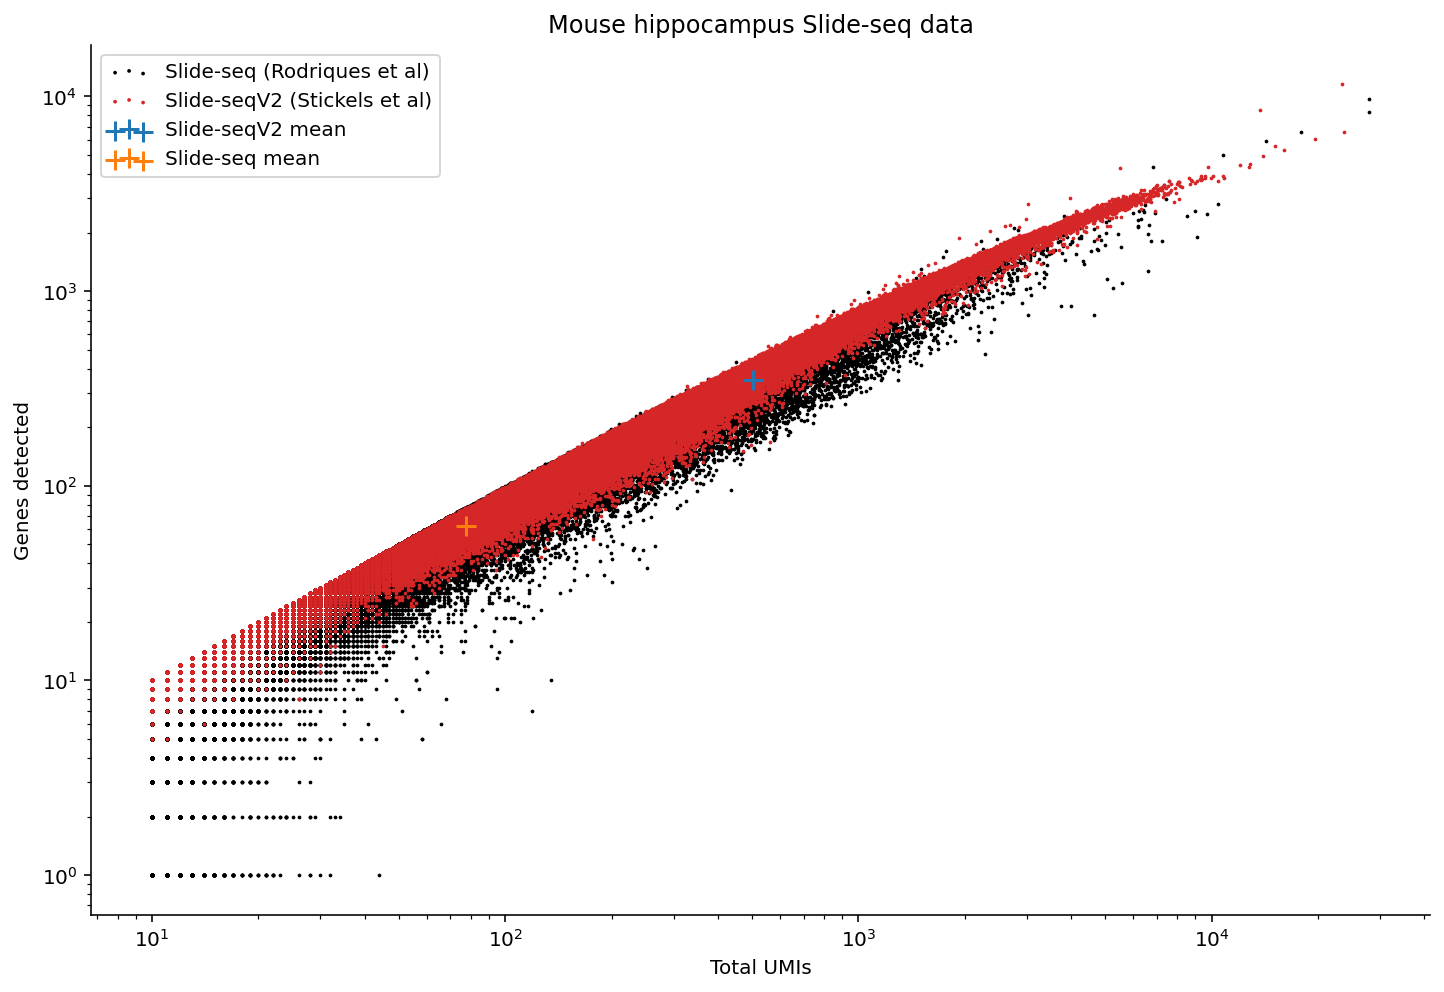

In [73]:
figsize(12, 8)
plt.loglog()

# Slide-seq
plt.scatter(
    slideseq.obs['total_counts'],
    slideseq.obs['detected_genes'],
    label='Slide-seq (Rodriques et al)',
    c='black',
    marker='.',
    s=3
)

# Slide-seqV2
plt.scatter(
    slideseqv2_hippocampus.obs['total_counts'],
    slideseqv2_hippocampus.obs['detected_genes'],
    label='Slide-seqV2 (Stickels et al)',
    c='C3',
    marker='.',
    s=3
)

plt.scatter([504.197322], [351.023422], label='Slide-seqV2 mean', c='C0', marker='+', s=100)
plt.scatter([77.316995], [62.332823], label='Slide-seq mean', c='C1', marker='+', s=100)


plt.legend(scatterpoints=3)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

plt.xlabel('Total UMIs')
plt.ylabel('Genes detected');

plt.title('Mouse hippocampus Slide-seq data');

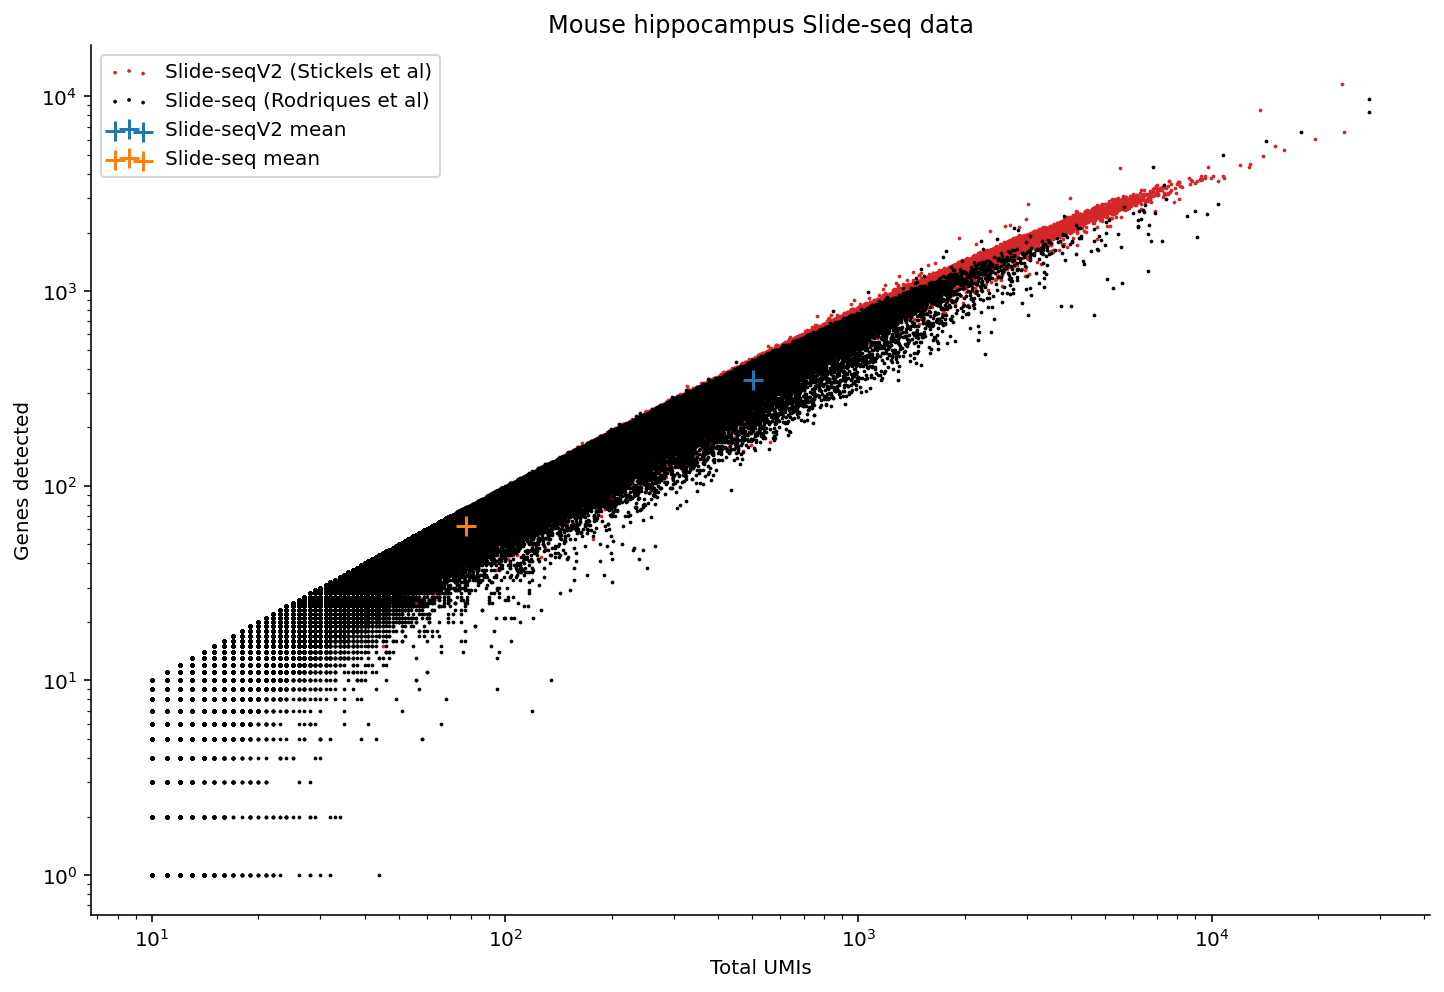

In [74]:
figsize(12, 8)
plt.loglog()

# Slide-seqV2
plt.scatter(
    slideseqv2_hippocampus.obs['total_counts'],
    slideseqv2_hippocampus.obs['detected_genes'],
    label='Slide-seqV2 (Stickels et al)',
    c='C3',
    marker='.',
    s=3
)

# Slide-seq
plt.scatter(
    slideseq.obs['total_counts'],
    slideseq.obs['detected_genes'],
    label='Slide-seq (Rodriques et al)',
    c='black',
    marker='.',
    s=3
)

plt.scatter([504.197322], [351.023422], label='Slide-seqV2 mean', c='C0', marker='+', s=100)
plt.scatter([77.316995], [62.332823], label='Slide-seq mean', c='C1', marker='+', s=100)

plt.legend(scatterpoints=3)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

plt.xlabel('Total UMIs')
plt.ylabel('Genes detected');

plt.title('Mouse hippocampus Slide-seq data');

In [59]:
slideseqv2_hippocampus.obs[['total_counts', 'detected_genes']].mean()

total_counts      504.197322
detected_genes    351.023422
dtype: float64

In [61]:
slideseq.obs[['total_counts', 'detected_genes']].mean()

total_counts      77.316995
detected_genes    62.332823
dtype: float64

In [68]:
504.197322 / 77.316995

6.521170694748289